All pdf files are from [this site](http://www.sudoku-download.net/sudoku_9x9.php)

There are 4 main parts of this project.
1. [Converting pdf files into separate puzzles]()
2. [Extracting some digits from puzzles and save with true labels (0 to 9)]()
3. [Train a digit recognizer]()
4. [Solve a puzzle and print out the result]()

I am going over brief summary of what I did and for details, you can check out the notebook files

In [1]:
import cv2
import matplotlib.pyplot as plt
import os

from utils import *

Each pdf file contain 6 puzzles like this

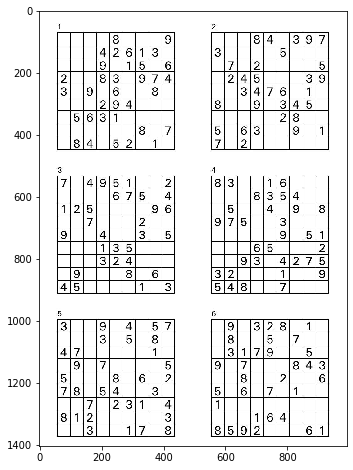

In [3]:
page = plt.imread('data/pages/easy_page_1.jpg')
plot_image(page)

I had to divide them into separate puzzles. Notice that the width and height are hard-coded. I got this values by trying different combinations.

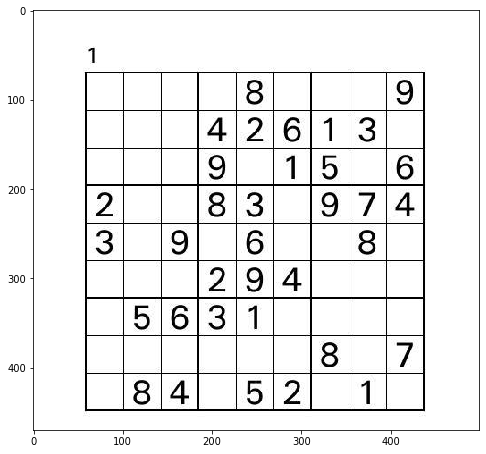

In [4]:
WIDTH, HEIGHT = 500, 470

puzzles = divide_page(page, WIDTH, HEIGHT)

plot_image(puzzles[0])

After getting contours of a puzzle and further processing, I got perfectly grabbed puzzle.

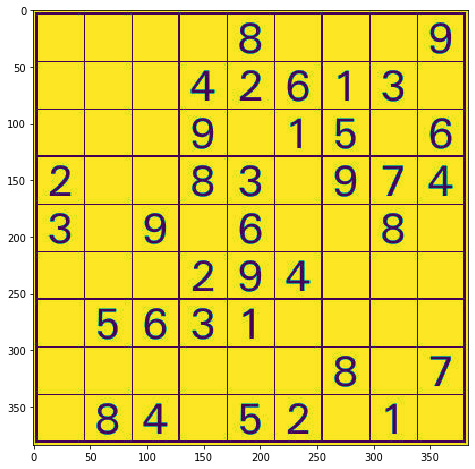

In [5]:
gray = cv2.cvtColor(puzzles[0], cv2.COLOR_RGB2GRAY)
boxes = get_bboxes([gray])
puzzle = extract_puzzle([gray], boxes)
puzzle = puzzle[0]

plot_image(puzzle)

Then I divided each cell so that I could save digit pixels with its labels for training data of a digit recognizer

In [6]:
gray = cv2.cvtColor(puzzles[0], cv2.COLOR_RGB2GRAY)
boxes = get_bboxes([gray])
puzzle = extract_puzzle([gray], boxes)
puzzle = puzzle[0]

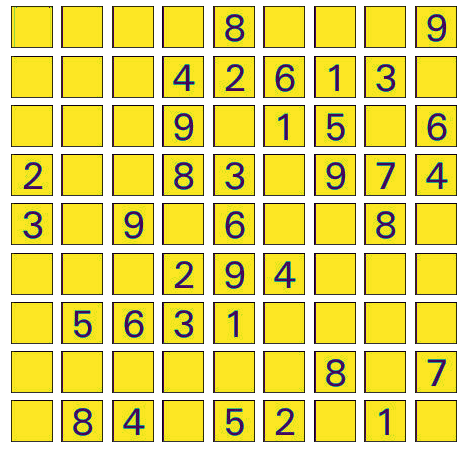

In [8]:
img = img[2:380, 2:380]
img[:, :3] = 255

fig, ax = plt.subplots(9, 9, figsize=(8, 8))
w, h = int(378/9), int(378/9)

for row in range(9):
    for col in range(9):
        cell = img[row*h:(row+1)*h, col*w:(col+1)*w]
        ax[row][col].imshow(cell)
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

Once I got these, I saved each cell with true labels which I manually extracted.

True labels are stored under data/digits as digits_puzzle.txt and digits_solution.txt

Each cell is flattened and label is inserted in the first column and saved as data.csv

Once I have data for training, I made a simple keras Convolutional model which has the following architecture

In [9]:
from keras.models import load_model
model = load_model('models/digit')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 42, 42, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 21, 21, 64)        256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 512)       295424    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 512)       0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 10, 10, 512)      

The training loss (forgot to create labels and ticks)

!['Loss'](reports/digit_recognizer_files/digit_recognizer_8_0.png)

I used 50 epochs, batch size of 16 and SGD with .001 learning rate and it was enough to get 100% accuracy for all digits

The actual solving part and its code can be found [here]()